/home/oscar/cv-model-compression/inference_testing


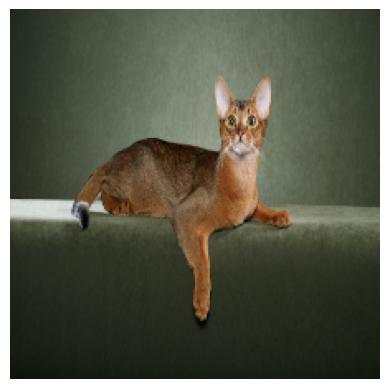

2025-03-21 17:03:11.879301195 [E:onnxruntime:, sequential_executor.cc:516 ExecuteKernel] Non-zero status code returned while running Reshape node. Name:'/roi_heads/Reshape_2' Status Message: /onnxruntime_src/onnxruntime/core/providers/cpu/tensor/reshape_helper.h:39 onnxruntime::ReshapeHelper::ReshapeHelper(const onnxruntime::TensorShape&, onnxruntime::TensorShapeVector&, bool) size != 0 && (input_shape_size % size) == 0 was false. The input tensor cannot be reshaped to the requested shape. Input shape:{83,363}, requested shape:{-1,4}



RuntimeException: [ONNXRuntimeError] : 6 : RUNTIME_EXCEPTION : Non-zero status code returned while running Reshape node. Name:'/roi_heads/Reshape_2' Status Message: /onnxruntime_src/onnxruntime/core/providers/cpu/tensor/reshape_helper.h:39 onnxruntime::ReshapeHelper::ReshapeHelper(const onnxruntime::TensorShape&, onnxruntime::TensorShapeVector&, bool) size != 0 && (input_shape_size % size) == 0 was false. The input tensor cannot be reshaped to the requested shape. Input shape:{83,363}, requested shape:{-1,4}


In [19]:
import onnxruntime as ort
import numpy as np
import inference_utils as utils
import importlib
importlib.reload(utils)
from PIL import Image
import os

# Load the ONNX model
model_path = "../models/fasterrcnn_mobilenet_v3_large_fpn_Opset17.onnx"
session = ort.InferenceSession(model_path)

# Get model input and output names
input_name = session.get_inputs()[0].name
output_names = [output.name for output in session.get_outputs()]

# Print output info for debugging
if False:
    for i, output in enumerate(session.get_outputs()):
        print(f"Output {i}: {output.name}, Shape: {output.shape}")

image_width = 224
image_height = 224

# Prepare input data
# This depends on your model's expected input shape and type
#image_path = "images/cropped_cars1.png"
image_path = "../oxford-iiit-pet/images/Abyssinian_1.jpg"
print(os.getcwd())
input_image = utils.image_to_tensor(image_path,width=image_width,height=image_height)

utils.show_image_from_tensor(input_image)
# Run inference
outputs = session.run(output_names, {input_name: input_image})

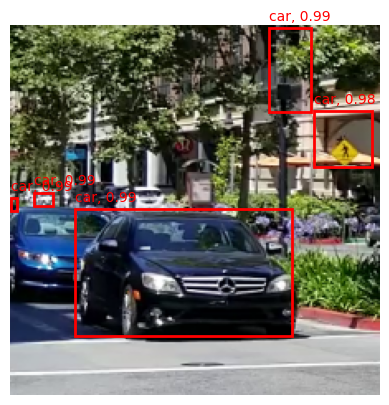

In [8]:
importlib.reload(utils)
bounding_boxes, classes, confidence = outputs
threshold = 0.98

confidence_truncated = utils.truncate_above_threshold(confidence,threshold)
num_reasonable_predications = len(confidence_truncated)
classes_truncated,bounding_boxes_truncated  = classes[:num_reasonable_predications], bounding_boxes[:num_reasonable_predications]

labels_file = "labels/coco-labels-2014_2017.txt"
labels = utils.labels_file_to_list(labels_file)

utils.show_image_with_boxes(input_image[0],bounding_boxes_truncated,confidence_truncated,classes_truncated,labels)

In [ ]:
from PIL import Image

# Open the image
image = Image.open("images/image2.png")

# Define the crop box (left, upper, right, lower)
# For example: crop 100px from each side
crop_box = (100, 200, 324, 424)

# Crop the image
cropped_image = image.crop(crop_box)

# Save or show the result
cropped_image.save("images/cropped_cars1.png")
# cropped_image.show()


In [ ]:
jpg_image = Image.open(image_path)

# Save it as PNG
jpg_image.save("output.png")